# Regression

## Introduction

We had already introduced the concept of a model to predict our data for linear behaviour.

We can extend such analysis to establish regression models that are better described with their equations.

This is in principle similar to the factorial design experiment, but we should favour the use of continuous variables in the model instead of categorical variables.

An example could be the test of a new formulation for an alloy where we can vary the concentration of two or more ingredients to adjust the final strength, in particular where we can choose any value of concentration continuously.

## CASE

An article describes the results of a nitride etch process on a single wafer plasma etcher. The process uses C2F6 gas and allows for control of four factors: 

1. The anode-cathode gap
2. The pressure in the reactor
3. The gas flow 
4. The power applied to the cathode.

We are interested in controlling the etch rate and we run one single time all possible combinations for the four factors. We decide to test two values per factor (low and high).

**What is/are the factors that are effecting the etch rate and how can we predict this rate based on those values?**

## Model

1. We have **4 input factors (gap, pressure, gas flow and power) with 2 possible levels each** 
2. We measure as our **output factor** the etch rate
3. We have some **controllable factors**: same operator, procedure, instruments, ...
4. We have some **uncontrollable factors**: room temperature when measuring, t...
5. We will measure four times each of the possible combinations
6. Because we have two values for each factors (low and high), we will have $2^4$ possible combinations for a total of $16$ measurements

**Is the etch rate affected by the gap, pressure, flow and/or power? Can we predict using a model new values of etch rate based on input gap, pressure, flow and/or power?**


## Randomization

The first step for this experiment is that the experiments should be done randomly. 

Every experiment and combination should be done in a random order as there is no blocking here.

The design requires us to capture each of the factors combinations for low/high values:

Run | Gap  | Pressure  | Flow  | Power  | Etching Rate  |
--- |----- |----- |----- |----- |---- |
 1  | Low  | Low  | Low  | Low  | 550  | 
 2  | High | Low  | Low  | Low  | 669  | 
 3  | Low  | High | Low  | Low  | 604  | 
 4  | High | High | Low  | Low  | 650  | 
 5  | Low  | Low  | High | Low  | 633  | 
 6  | High | Low  | High | Low  | 642  | 
 7  | Low  | High | High | Low  | 601  | 
 8  | High | High | High | Low  | 635  | 
 9  | Low  | Low  | Low  | High | 1037 | 
10  | High | Low  | Low  | High | 749  | 
11  | Low  | High | Low  | High | 1052 | 
12  | High | High | Low  | High | 868  | 
13  | Low  | Low  | High | High | 1075 | 
14  | High | Low  | High | High | 860  | 
15  | Low  | High | High | High | 1063 | 
16  | High | High | High | High | 729  | 

We enter this data as we did before in a dataframe making sure we capture the combinations as experimentally done and all the repetitions:

In [4]:
import pandas as pd
import numpy as np
import matplotlib

%matplotlib inline

# Put into dataframe
dta2 = np.rec.array([
    (  1,  '-', '-', '-', '-',  550), (  2,  '+', '-', '-', '-', 669) , (  3, '-', '+', '-', '-',  604) , (  4,  '+', '+', '-', '-', 650) , 
    (  5,  '-', '-', '+', '-',  633), (  6,  '+', '-', '+', '-', 642) , (  7, '-', '+', '+', '-',  601) , (  8,  '+', '+', '+', '-', 635) , 
    (  9,  '-', '-', '-', '+', 1037), ( 10,  '+', '-', '-', '+', 749) , ( 11, '-', '+', '-', '+', 1052) , ( 12,  '+', '+', '-', '+', 868) , 
    ( 13,  '-', '-', '+', '+', 1075), ( 14,  '+', '-', '+', '+', 860) , ( 15, '-', '+', '+', '+', 1063) , ( 16,  '+', '+', '+', '+', 729) ], 
    dtype=[('id', '<i4'), ('Gap', '|S17'), ('Pressure', '|S15'),  ('Flow', '|S17'), ('Power', '|S15'), ('Rate', '<f')])
    
df = pd.DataFrame(dta2)
print(df)

    id   Gap Pressure  Flow Power    Rate
0    1  b'-'     b'-'  b'-'  b'-'   550.0
1    2  b'+'     b'-'  b'-'  b'-'   669.0
2    3  b'-'     b'+'  b'-'  b'-'   604.0
3    4  b'+'     b'+'  b'-'  b'-'   650.0
4    5  b'-'     b'-'  b'+'  b'-'   633.0
5    6  b'+'     b'-'  b'+'  b'-'   642.0
6    7  b'-'     b'+'  b'+'  b'-'   601.0
7    8  b'+'     b'+'  b'+'  b'-'   635.0
8    9  b'-'     b'-'  b'-'  b'+'  1037.0
9   10  b'+'     b'-'  b'-'  b'+'   749.0
10  11  b'-'     b'+'  b'-'  b'+'  1052.0
11  12  b'+'     b'+'  b'-'  b'+'   868.0
12  13  b'-'     b'-'  b'+'  b'+'  1075.0
13  14  b'+'     b'-'  b'+'  b'+'   860.0
14  15  b'-'     b'+'  b'+'  b'+'  1063.0
15  16  b'+'     b'+'  b'+'  b'+'   729.0


## Hypothesis Testing

When using a factorial design the hypothesis testing is similar as always but the **model** is different.

If we consider that the result we measure is 

$$y_{ijk}=\mu+\tau_i+\beta_j+\alpha_{k}+\gamma_{l}+\epsilon_{ijkl}$$

Where $\tau_i$ represents variations per factor A we want to analyse (the gap here)

And $\beta_j$ represents variations per factor B we want to analyse (the pressure here)

And $\alpha_k$ represents variations per factor C we want to analyse (the flow here)

And $\gamma_l$ represents variations per factor D we want to analyse (the power here)

And $\mu$ is the mean considered the same for all 

And $\epsilon_{ijkl}$ are small variations per experiment 

We want to test the hypothesis for each factor. 

For **the gap** that this $\tau_i$ is non-existent $\tau_1=\tau_2=...\tau_i=0$ meaning there are no differences between the CTs. If we reject that hypothesis then we know there is at least one factor where the population has a different mean and therefore the alternative hypothesis $H_1$ is valid.

For **the pressure** that this $\beta_i$ is non-existent $\beta_1=\beta_2=...\beta_j=0$ meaning there are no differences between the CTs. If we reject that hypothesis then we know there is at least one factor where the population has a different mean and therefore the alternative hypothesis $H_1$ is valid.

And so on for the other two factors.

**We will reject the null hypothesis $H_0$ if p<0.05**. This means that there is less than 5% chance we made a mistake in rejecting the hypothesis and therefore we are quite certain that at least one factor changes the rate.

We can account for this by using a N-way ANOVA.

You can check you the $F$ statistic is affected by the N-way ANOVA and how this matches the equations discussed in lecture.

We will construct the **model** used accounts for **all** factors.

And then running the ANOVA test and print the results:

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('Rate ~ Gap + Pressure + Flow + Power ',df).fit()   #this ensures it is a N-way ANOVA 
    
anovaResults =  anova_lm(model, typ=2)

print(anovaResults)

               sum_sq    df          F    PR(>F)
Gap        41310.5625   1.0   3.950339  0.072330
Pressure      10.5625   1.0   0.001010  0.975216
Flow         217.5625   1.0   0.020805  0.887921
Power     374850.0625   1.0  35.845191  0.000091
Residual  115032.1875  11.0        NaN       NaN


From these results we can conclude that neither the pressure nor the flow are changing the rate as the value of **p** (PR(>F) is not significant for both factors. 

We can now eliminate those two factors and we automatically have a 2-factor model with repeat x 2 of our measurements.

We now merge the data:

In [7]:
df2factors=df.drop(['Pressure', 'Flow'], axis=1)

print(df2factors)

    id   Gap Power    Rate
0    1  b'-'  b'-'   550.0
1    2  b'+'  b'-'   669.0
2    3  b'-'  b'-'   604.0
3    4  b'+'  b'-'   650.0
4    5  b'-'  b'-'   633.0
5    6  b'+'  b'-'   642.0
6    7  b'-'  b'-'   601.0
7    8  b'+'  b'-'   635.0
8    9  b'-'  b'+'  1037.0
9   10  b'+'  b'+'   749.0
10  11  b'-'  b'+'  1052.0
11  12  b'+'  b'+'   868.0
12  13  b'-'  b'+'  1075.0
13  14  b'+'  b'+'   860.0
14  15  b'-'  b'+'  1063.0
15  16  b'+'  b'+'   729.0


From these merged data we can repeat the analysis and since we have repeat measurements we **must** enter the interactions in the model:

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('Rate ~ Gap + Power + Gap:Power ',df2factors).fit()   #this ensures it is a N-way ANOVA 
    
anovaResults =  anova_lm(model, typ=2)

print(anovaResults)

                sum_sq    df           F        PR(>F)
Gap         41310.5625   1.0   23.767029  3.816422e-04
Power      374850.0625   1.0  215.660881  4.951261e-09
Gap:Power   94402.5625   1.0   54.312222  8.620836e-06
Residual    20857.7500  12.0         NaN           NaN


Showing that gap, power and the interaction are all significant. We can run the Tukey HSD as we have done before.

First we do this for the Power:

In [12]:
from statsmodels.stats.multicomp import MultiComparison

#The multiple comparison testing is done between data without the average contribution from the phantom
mc = MultiComparison(df2factors['Rate'] - df2factors.groupby(dta2['Gap'])['Rate'].transform('mean'), df2factors['Power'])
# so we test once we remove this average contribution from the 2nd factor
tukey_res = mc.tukeyhsd()
summary = tukey_res.summary()
print(summary)

#The p-values associated with those hypothesis
from statsmodels.stats.libqsturng import psturng
p_values = psturng(np.abs(tukey_res.meandiffs / tukey_res.std_pairs), len(tukey_res.groupsunique), tukey_res.df_total)
print("p values:", p_values)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff   lower     upper   reject
-------------------------------------------------
 b'+'   b'-'  -306.125 -403.4288 -208.8212  True 
-------------------------------------------------
p values: 0.001


Because the p=0.001 this was expected. We can visualize graphically:

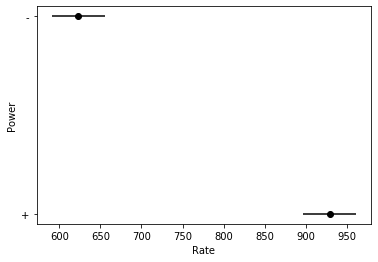

In [13]:
import matplotlib.pyplot as plt

grouped = df2factors.groupby(dta2['Power'])
PHigh=grouped.get_group('+'.encode('UTF-8'))['Rate']
PLow=grouped.get_group('-'.encode('UTF-8'))['Rate']

plt.errorbar([np.mean(PHigh), np.mean(PLow)], ['+', '-'], xerr=[tukey_res.std_pairs[0], tukey_res.std_pairs[0]], marker='o', linestyle='None', color='k', ecolor='k')
plt.ylabel('Power')
plt.xlabel('Rate')
plt.show()

And then for the effect of the Gap:

In [14]:
from statsmodels.stats.multicomp import MultiComparison

#The multiple comparison testing is done between data without the average contribution from the phantom
mc = MultiComparison(df2factors['Rate'] - df2factors.groupby(dta2['Power'])['Rate'].transform('mean'), df2factors['Gap'])
# df.groupby(dta2['Phantom'])['Density'].transform('mean') is averaging the grouped data for each phantom 
# so we test density once we remove this average phantom contribution 
tukey_res = mc.tukeyhsd()
summary = tukey_res.summary()
print(summary)

#The p-values associated with those hypothesis
from statsmodels.stats.libqsturng import psturng
p_values = psturng(np.abs(tukey_res.meandiffs / tukey_res.std_pairs), len(tukey_res.groupsunique), tukey_res.df_total)
print("p values:", p_values)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower   upper   reject
---------------------------------------------
 b'+'   b'-'  101.625  4.3212 198.9288  True 
---------------------------------------------
p values: [0.04183352]


Which can be seen graphically:

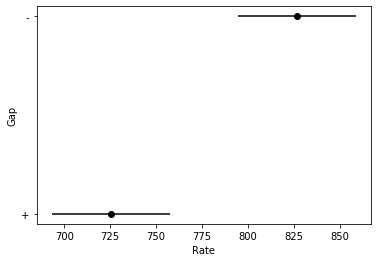

In [16]:
import matplotlib.pyplot as plt

grouped = df2factors.groupby(dta2['Gap'])
GHigh=grouped.get_group('+'.encode('UTF-8'))['Rate']
GLow=grouped.get_group('-'.encode('UTF-8'))['Rate']

plt.errorbar([np.mean(GHigh), np.mean(GLow)], ['+', '-'], xerr=[tukey_res.std_pairs[0], tukey_res.std_pairs[0]], marker='o', linestyle='None', color='k', ecolor='k')
plt.ylabel('Gap')
plt.xlabel('Rate')
plt.show()

For the interaction we need to do some data merging so we can analyse it. We will combine the data so their name is given by the combination we used, and then run the Tukey HSD:

In [18]:
from statsmodels.stats.multicomp import MultiComparison


#We combine the names
interaction_groups = "Gap_" + df2factors.Gap.astype(str) + " & " + "Power_" + df2factors.Power.astype(str)

mc = MultiComparison(df2factors['Rate'] , interaction_groups)
tukey_res = mc.tukeyhsd()
summary = tukey_res.summary()
print(summary)

#The p-values associated with those hypothesis
from statsmodels.stats.libqsturng import psturng
p_values = psturng(np.abs(tukey_res.meandiffs / tukey_res.std_pairs), len(tukey_res.groupsunique), tukey_res.df_total)
print("p values:", p_values)

               Multiple Comparison of Means - Tukey HSD,FWER=0.05              
        group1                group2        meandiff   lower     upper   reject
-------------------------------------------------------------------------------
Gap_b'+' & Power_b'+' Gap_b'+' & Power_b'-'  -152.5  -240.0336  -64.9664  True 
Gap_b'+' & Power_b'+' Gap_b'-' & Power_b'+'  255.25   167.7164  342.7836  True 
Gap_b'+' & Power_b'+' Gap_b'-' & Power_b'-'  -204.5  -292.0336 -116.9664  True 
Gap_b'+' & Power_b'-' Gap_b'-' & Power_b'+'  407.75   320.2164  495.2836  True 
Gap_b'+' & Power_b'-' Gap_b'-' & Power_b'-'  -52.0   -139.5336  35.5336  False 
Gap_b'-' & Power_b'+' Gap_b'-' & Power_b'-' -459.75  -547.2836 -372.2164  True 
-------------------------------------------------------------------------------
p values: [0.00114733 0.001      0.001      0.001      0.33595711 0.001     ]


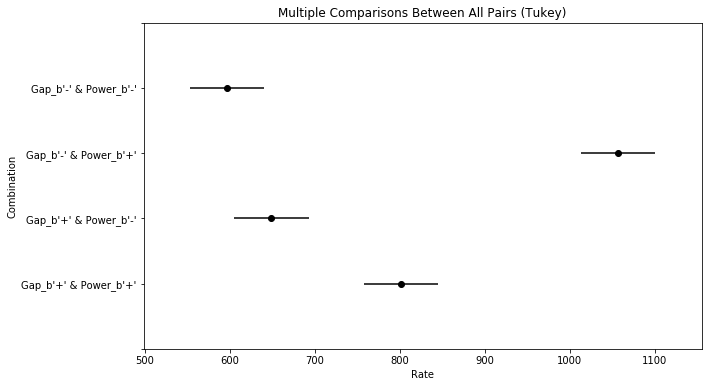

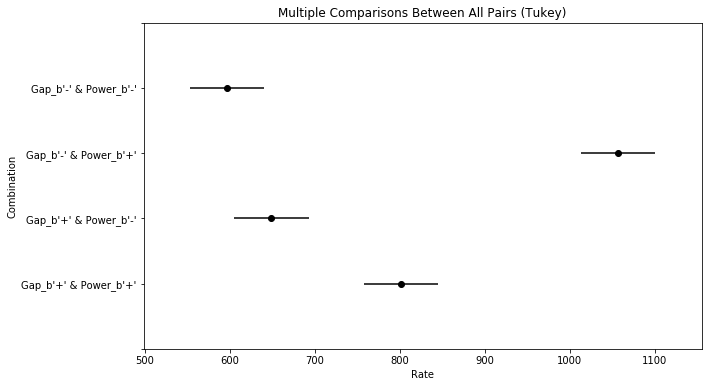

In [19]:
tukey_res.plot_simultaneous(ylabel= "Combination", xlabel= "Rate")

Analysing the interaction:
1. When using low power the gap does not make a difference
2. All other interactions are significant

## Activity: write down other possible conclusions while analysing the data

## Statistical Power

As for other ANOVA tests we can do power calculations. There are no readily available tools to calculate the power of a factorial design  to answer:

1. How sure am I that if I was correct in **not** rejecting the null hypothesis? **Type II error**
2. How many samples would I have needed if I wanted to detect a specific difference

We can use the ROC graphs ensuring we use the right degrees of freedom, or we can use the functions in Python.

Note that the degrees of freedom are in the ANOVA table, the numerator is related to the factor of interest, the denominator to the *Residual*. Also note that if you erroneously used a 1-way ANOVA or combined the data, those degrees of freedom will be erroneous as well !

For power calculations we will need to calculate the **effect size**, which is defined by the $\eta^2$. We will calculate this value here for the whole table. 

Note that for each factor this is obtained from:

$$\eta^2=\frac{SS_{factor}}{SS_{factor}+SS_{error}}$$

Remember the $SS_{error}$ is the *Residual*

We will calculate $\eta^2$ for each of the factors.

In [20]:
# We first extract SS_error from the ANOVA table
SS_error = anovaResults[-1:]['sum_sq'][0]   # the last row is -1 and it is the Residuals

# Then calculate eta_sqare with the formula for all factors (0:one less of the total rows as those are Resiguals)
eta_sq = anovaResults[0:len(anovaResults)-1]['sum_sq']/(anovaResults[0:len(anovaResults)-1]['sum_sq']+SS_error)

# This code will add a column to the ANOVA results with the EtaSquare 
anovaResults['eta_sq'] = eta_sq

print(anovaResults)

                sum_sq    df           F        PR(>F)    eta_sq
Gap         41310.5625   1.0   23.767029  3.816422e-04  0.664495
Power      374850.0625   1.0  215.660881  4.951261e-09  0.947290
Gap:Power   94402.5625   1.0   54.312222  8.620836e-06  0.819038
Residual    20857.7500  12.0         NaN           NaN       NaN


With the effect size $\eta^2$ can be then used to perform a ANOVA Power test. 

Note that for now, Python **does not** have a power calculation function that accounts for more than one effect so we will use again **R. R** is a great tool for statistics although it requires often quite a bit of training to use as they use often statistic terms. But if you have the name of the function to run you can invoke it from Python.

For factorial design R does not have a specific power calculation but a sample calculation can also give us a good answer. If we have enough samples to achieve a power of 80% we are in a good position.

In [29]:
# We first export a package rpy2 that allows to run R within Python
%load_ext rpy2.ipython
# and the robject that will let me invoke R objects
import rpy2.robjects as robjects

#finally, I prepare myself the string that will be passed to run to R
#note that I will manually enter here for simplicity the values 
rstring="""
library(easypower)
main.eff.1 <- list(name = "Gap", levels = 3, eta.sq = 0.664495)
main.eff.2 <- list(name = "Power", levels = 3, eta.sq = 0.947290)
n.multiway(iv1=main.eff.1, iv2=main.eff.2, interaction.eta2 = 0.819038, result="highest", sig.level = 0.05, power = 0.9999)
""" #quick note for this multiway, the highest parameter is giving us the maximum number of samples required

#and invoke R
rfunc=robjects.r(rstring)
#finally, I print what R obtained as a result
print(rfunc)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Treatment: Gap

Effect Size: 0.664495

Total N: 28

n per cell: 4





R is telling us that to have a power of 80% and a significance of 95% we then need to have 16 samples in total or 2 samples per cell. We have 3 samples per cell so we can ensure we have this power.

## Activity: try higher power levels to determine the real power for our test number of samples per cell

## Fitting Data

One final concept to review in factorial design is the **$R^2$**. This tells us the probability that the model we have determined is indeed explained by the factors and interactions we found to be significant.

$$R^2 = \frac{SS_{factor1} + SS_{factor2} + ... + SS_{factorp} + SS_{interactions}}{SS_{total}}$$

We can obtain from the ANOVA results those values and calculate $R^2$

In [30]:
SS_nominator = np.sum(anovaResults[:-1]['sum_sq'] )
SS_total = np.sum(anovaResults[:]['sum_sq'])  #Note the total includes residual

R_square = SS_nominator/SS_total

print(R_square)

0.9607509818899447


Telling us that there is a 96.08%  probability that the variability in rate is explained by the gap and the power considering interaction between those factors.

Finally, the **statsmodels** package that we have used for ANOVA can also provide us with a fit information for the factorial design. 

We already had fitted the model using *ols*, so we can print a summary of that model and inspect the result.

We will now finalize the fit analysis using this function by printing the model summary.

In [31]:
modelFit = ols('Rate ~ Gap + Power + Gap:Power',df2factors).fit()

print(modelFit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rate   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     97.91
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           1.05e-08
Time:                        11:43:32   Log-Likelihood:                -80.086
No. Observations:                  16   AIC:                             168.2
Df Residuals:                      12   BIC:                             171.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             801.5000    

C:\Users\lcuri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


We can observe:

1. $R^2$ value in here as well and indicates a very good model 
2. The adjusted $R^2$ being reasonably close to the $R^2$ indicates that accounting for the number of samples the model accuracy is maintained
3. Our $F$ and the associated $p$ indicates that we can be quite confident that our model is linear $p<<0.001$
4. Going feature by feature we see that all are required for prediction, including the interaction. 

We could use that table to do predictions as we did for **factorial design** but remember these are categorical variables. It is more interesting to do a regression but for that we would require the values to be continuous.

But we do have the values for "low" and "high" for each case, so we can transform the data.

* Power Low = 275
* Power High = 325
* Gap Low = 0.8
* Gap High = 1.2

In [35]:
df2factorsNumeric = df2factors

dtaP=df2factorsNumeric['Power'].replace('+'.encode('UTF-8'),325)   #in dta3 we have the data with dropped columns
dtaP=dtaP.replace('-'.encode('UTF-8'),275)
dtaG=df2factorsNumeric['Gap'].replace('+'.encode('UTF-8'),1.2)
dtaG=dtaG.replace('-'.encode('UTF-8'),0.8)

df2factorsNumeric['Power']=dtaP
df2factorsNumeric['Gap']=dtaG

df2factors=df.drop(['Pressure', 'Flow'], axis=1)

print(df2factorsNumeric)

    id  Gap  Power    Rate
0    1  0.8    275   550.0
1    2  1.2    275   669.0
2    3  0.8    275   604.0
3    4  1.2    275   650.0
4    5  0.8    275   633.0
5    6  1.2    275   642.0
6    7  0.8    275   601.0
7    8  1.2    275   635.0
8    9  0.8    325  1037.0
9   10  1.2    325   749.0
10  11  0.8    325  1052.0
11  12  1.2    325   868.0
12  13  0.8    325  1075.0
13  14  1.2    325   860.0
14  15  0.8    325  1063.0
15  16  1.2    325   729.0


In [38]:
from sklearn import linear_model

X = df2factorsNumeric[['Gap','Power']] # here we have 2 variables for multiple regression that are independent 
Y = df2factorsNumeric ['Rate'] #here we have the dependent variable

regr = linear_model.LinearRegression()  #the linear regression
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -806.625
Coefficients: 
 [-254.0625    6.1225]


Just to double check, note that using OLS we get the same result. 

In [40]:
import statsmodels.regression.linear_model as sm

X = sm.add_constant(X)
modelFitNumeric = sm.OLS(Y, X).fit()

print(modelFitNumeric.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rate   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     23.47
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           4.85e-05
Time:                        11:56:18   Log-Likelihood:                -93.762
No. Observations:                  16   AIC:                             193.5
Df Residuals:                      13   BIC:                             195.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -806.6250    306.925     -2.628      0.0

C:\Users\lcuri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


With the fit we can make a prediction, and finally make a graph of the predicted surface and the scatter of the points that were measured.

<IPython.core.display.Javascript object>


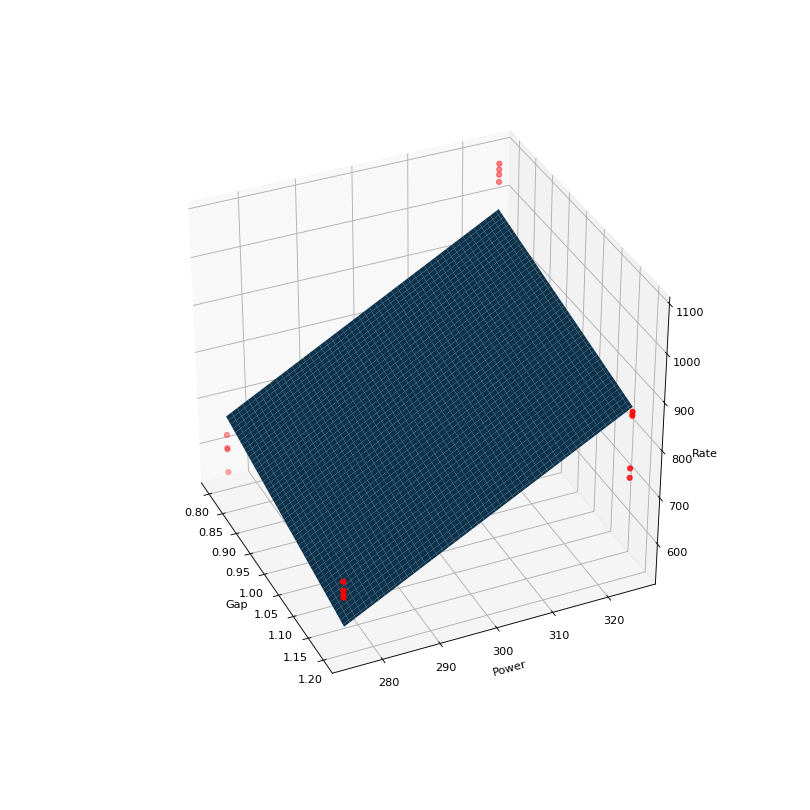

In [43]:
%matplotlib nbagg   
#we will need this magic command to rotate our 3d curve

from mpl_toolkits.mplot3d import Axes3D   #needed for the 3D plotting

xsurf,ysurf=np.meshgrid(np.linspace(df2factorsNumeric.Gap.min(),df2factorsNumeric.Gap.max(),100),
                        np.linspace(df2factorsNumeric.Power.min(),df2factorsNumeric.Power.max(),100))

xvariables=pd.DataFrame({'Gap': xsurf.ravel(),'Power': ysurf.ravel()})

fittedValues = regr.predict(xvariables)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2factorsNumeric['Gap'],df2factorsNumeric['Power'], df2factorsNumeric['Rate'], c='red')
ax.plot_surface(xsurf,ysurf,fittedValues.reshape(xsurf.shape))
ax.set_xlabel('Gap')
ax.set_ylabel('Power')
ax.set_zlabel('Rate')
plt.show()

## CASE

We have obtained data on the intensity in an image as a function of concentration of a product that increases the signal (contrast agent).

We want to describe this phenomenon using an equation. We have measured intensity values as a function of time from $5.84ms$ every $29.2ms$ for different concentrations of contrast agent.

. | Acquisition Time |
--|----------------- |

Conc  |5.84ms | 35.04ms | 64.24ms | 93.44ms | 122.64ms| 151.84ms| 181.04ms| 210.24ms| 268.64ms| 297.84ms|
----- |--- |----- |---- |------ |---- |---- |------ |------ |------ |------ |
1.25  |100 |  54  | 11  |  8    |  6  |   2 |     1 |     1 |     1 |     1 |
31.25 |100 |  75  | 35  |  23   | 11  |   8 |     4 |     3 |     2 |     1 |
62.5  |100 |  93  | 63  |  49   | 35  |  28 |    19 |    16 |    11 |    9  |
125.0 |100 | 81   | 70  |  60   | 52  |  44 |    39 |    33 |    29 |    25 |


## Model

1. We have **2 input factors (concentration and time) with 4 and 12 possible levels respectively** 
2. We measure as our **output factor** the intensity
3. We have some **controllable factors**: same operator, procedure, instruments, ...
4. We have some **uncontrollable factors**: room temperature when measuring, t...

**What is the expression that relates the intensity to the acquisition time? Is it the same for all concentrations?**

We enter this data as we did before in a dataframe. I will introduce here some features from panda for reading from CSV files that are useful in collected data. I will read the CSV and then move to an array that will be plotted:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

dta = pd.read_csv('Book1.csv')
df = pd.DataFrame(dta)

data_array=df.values   #this gets the data only (no labels in the data frame)
intensity_data_array=np.delete(data_array, 0, 1)   #this eliminates the first column that we know is the concentration
concentrations=np.delete(data_array, np.s_[1::], 1)
concentrations=np.squeeze(concentrations)
titles_data_array=df.columns.values  #gets the columns (note they are strings)
time_data=[float(numeric_string) for numeric_string in titles_data_array[1:]]   #converts strings to floats without the first column that is not data

And we can plot the 4 different series as scatter points. We note that they all have an exponential decreasing behaviour.

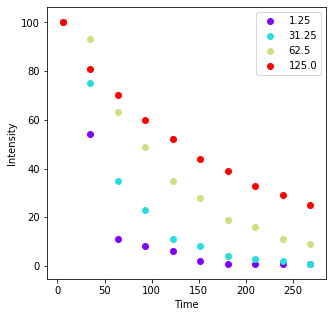

In [2]:
%matplotlib inline

fig = plt.figure(figsize=(5,5))
colors = cm.rainbow(np.linspace(0, 1, len(intensity_data_array)))
for y, c in zip(intensity_data_array, colors):
    plt.scatter(time_data, y, color=c)

plt.legend(concentrations)
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.show()

From these results we can conclude that we need to find an expression between time and intensity that is exponential.

We first define the desired function to be fitted. We will use scipy optimize, in particular curve_fit to perform this curve fitting.

In [3]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a*np.exp(-b*x)+c

Curve fitting will provide an array with the parameters (in this case a, b and c) as a result, so we initialize an array where we will keep those values for each of the curves we are fitting.

In addition, we will calculate the $R^2$ for each fit.

In [4]:
popta=pcova=np.zeros(shape=(4,3))
r_squared=np.zeros(4)

for cn in range(4):  #we will calculate a fit for each of the concentrations
    popt, pcov = curve_fit(func, time_data, intensity_data_array[cn], p0=(1, 1e-6, 1))
    popta[cn,:]=popt

And we finally plot the data with the prediction.

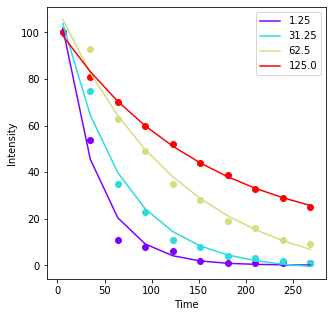

In [5]:
#plotting here all the datapoints, each a different colour
fig = plt.figure(figsize=(5,5))
colors = cm.rainbow(np.linspace(0, 1, len(intensity_data_array)))
cn=0
for y, c in zip(intensity_data_array, colors):
    plt.scatter(time_data, y, color=c)
    time_data_exp=np.multiply(time_data,-popta[cn,1])
    prediction=popta[cn,0]*np.exp(time_data_exp)+popta[cn,2]
    plt.plot(time_data, prediction, color=c)
    
    residuals = prediction - y
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((prediction-np.mean(prediction))**2)
    r_squared[cn] = 1 - (ss_res / ss_tot)

    cn=cn+1

plt.xlabel('Time')
plt.ylabel('Intensity')
plt.legend(concentrations)
plt.show()

We can print the equation for each of the curves and the value of $R^2$ for each fit. With such values of $R^2$ we have a very good fit for all equations.

In [6]:
for cn in range(4):
    print('Equation for %.2f uL : Intensity(time) = %.2f*exp(-%.4f*time)+%.4f \t R_squared = %.4f' %(concentrations[cn], popta[cn,0], popta[cn,1], popta[cn,2], r_squared[cn]))

Equation for 1.25 uL : Intensity(time) = 118.66*exp(-0.0276*time)+0.1078 	 R_squared = 0.9823
Equation for 31.25 uL : Intensity(time) = 115.71*exp(-0.0159*time)+-2.0559 	 R_squared = 0.9842
Equation for 62.50 uL : Intensity(time) = 118.56*exp(-0.0077*time)+-7.9765 	 R_squared = 0.9836
Equation for 125.00 uL : Intensity(time) = 92.10*exp(-0.0065*time)+9.7833 	 R_squared = 0.9983


## Summary

In this example:

1. We introduced the principle for regression from reduced data when some factors are not significant
2. We applied a N-way ANOVA to analyse trends in dependency of parametric data
3. We applied a data fit using parametric and numerical values using ordinary least squares regression model
4. We introduced data prediction and representation including the fit in 2D
5. We introduced general curve fitting for non-linear equations
6. We introduced evaluation of curve fitting and data representation from predictions

References
---------------

* Montgomery, Douglas C. "Design and analysis of experiments. John Wiley & Sons." Inc., New York 1997 (2001).